##Problem Statement
The aim of this study is to analyze the relationship between various student, family, and school-related factors and their impact on student exam scores. By examining attributes such as study habits, attendance, parental involvement, access to resources, extracurricular activities, and socioeconomic background, we seek to identify which factors most significantly influence academic performance. The goal is to build a predictive model that accurately forecasts exam scores based on these variables, enabling educational institutions and policymakers to focus on the most impactful areas for student success.

## Data and libreas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df=pd.read_csv("/content/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## data decription

This dataset captures a comprehensive range of factors that may influence a student’s academic performance, particularly focusing on exam scores. The data includes variables related to the student’s study habits, like hours studied and attendance, as well as aspects of their personal environment, such as parental involvement, family income, and parental education level. Additionally, school-related factors like teacher quality, school type, and peer influence are included, which may affect learning outcomes. Other factors like access to resources, extracurricular activities, and physical activity add context to the student’s lifestyle and access to supportive environments. By analyzing these factors, we aim to identify key contributors to academic success and understand how different elements, from socioeconomic background to study routines, impact exam scores. This analysis could provide valuable insights for educators, parents, and policymakers, enabling them to make informed decisions that enhance student performance.

## Data understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# **DATA CLEANING and PREPARATION**

In [ ]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna("Unknown")

In [ ]:
df["Teacher_Quality"].unique()

array(['Medium', 'High', 'Low', 'Unknown'], dtype=object)

In [ ]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna("Unknown")

In [ ]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', 'Unknown'], dtype=object)

In [ ]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna("Unknown")

In [ ]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', 'Unknown'], dtype=object)

# **Mapping ordinal**

In [ ]:
import pandas as pd

# Mapping ordinal values to numbers
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Parental_Involvement'] = df['Parental_Involvement'].map(ordinal_mapping)

ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Access_to_Resources'] = df['Access_to_Resources'].map(ordinal_mapping)

ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Motivation_Level'] = df['Motivation_Level'].map(ordinal_mapping)

ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family_Income'] = df['Family_Income'].map(ordinal_mapping)

ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3,'Unknown':4}
df['Teacher_Quality'] = df['Teacher_Quality'].map(ordinal_mapping)

ordinal_mapping = {'Negative': 1, 'Positive': 2, 'Neutral': 3}
df['Peer_Influence'] = df['Peer_Influence'].map(ordinal_mapping)

ordinal_mapping = {'High School': 1, 'College': 2,'Postgraduate':3,'Unknown':4}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(ordinal_mapping)

ordinal_mapping = {'Near': 1, 'Moderate': 2,'Far':3,'Unknown':4}
df['Distance_from_Home'] = df['Distance_from_Home'].map(ordinal_mapping)

# **DATA ENCODING**

- Label Encoding: Categorical features (like extracurricular_activities,gender,school_type etc..) are converted into numeric values using LabelEncoder to prepare them for modeling. This transformation is necessary as machine learning models typically handle numerical values better than text.

- Also add histogram of the data after encoding

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 labelencoder = LabelEncoder()
 df['Extracurricular_Activities'] = labelencoder.fit_transform(df['Extracurricular_Activities'])
 df['Gender'] = labelencoder.fit_transform(df['Gender'])
 df['Learning_Disabilities'] = labelencoder.fit_transform(df['Learning_Disabilities'])
 df['School_Type'] = labelencoder.fit_transform(df['School_Type'])
 df['Internet_Access'] = labelencoder.fit_transform(df['Internet_Access'])


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,2,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,1,4,0,2,2,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,3,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,1,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,3,4,0,2,1,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,0,7,76,2,1,1,3,2,1,2,2,0,1,1,0,68
6603,23,76,3,2,0,8,81,2,1,3,1,3,1,2,2,0,1,1,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,1,2,0,3,1,0,68
6605,10,86,3,3,1,6,91,3,1,2,1,2,0,2,3,0,1,3,0,68


# **DATA VISUALIZATION**

<Axes: xlabel='Exam_Score', ylabel='Count'>

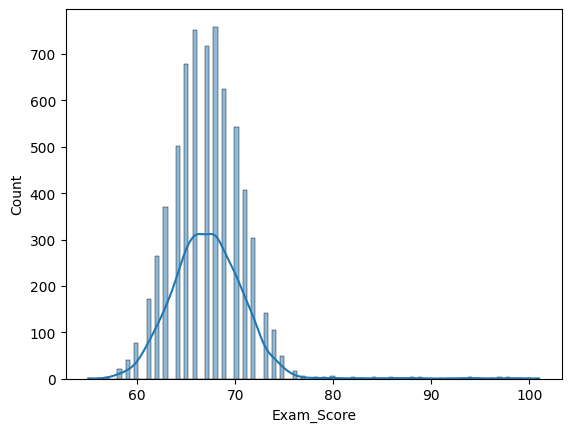

In [ ]:
sns.histplot(df['Exam_Score'],kde=True)

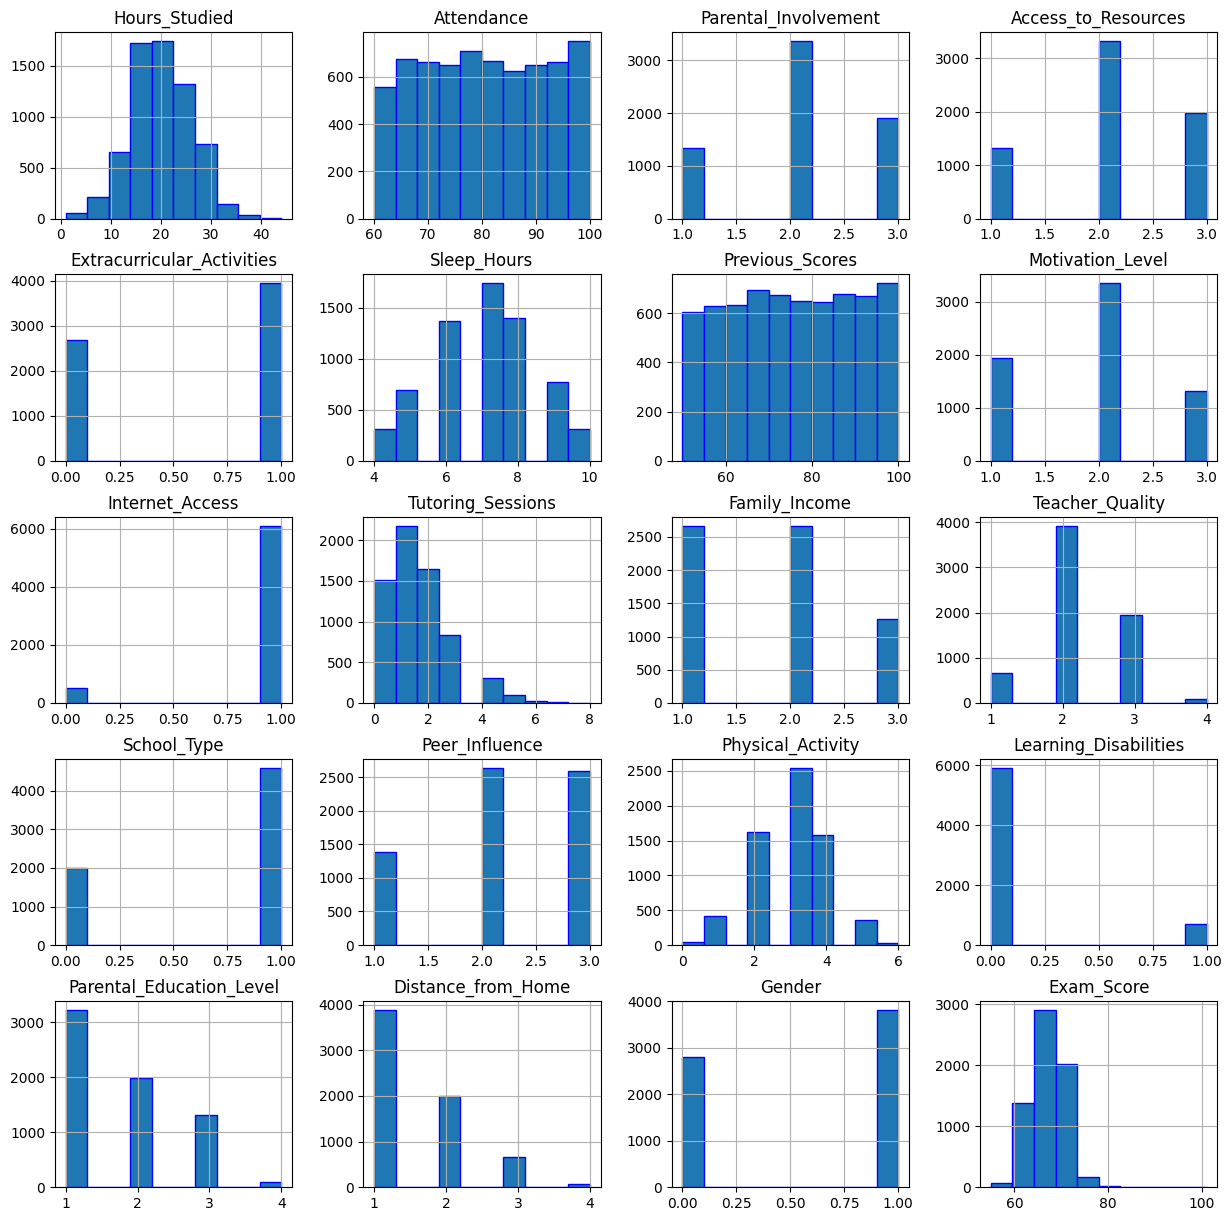

In [ ]:
df.hist(edgecolor="b",figsize=(15,15))
plt.show()

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# **CORRELATION ANALYSIS**

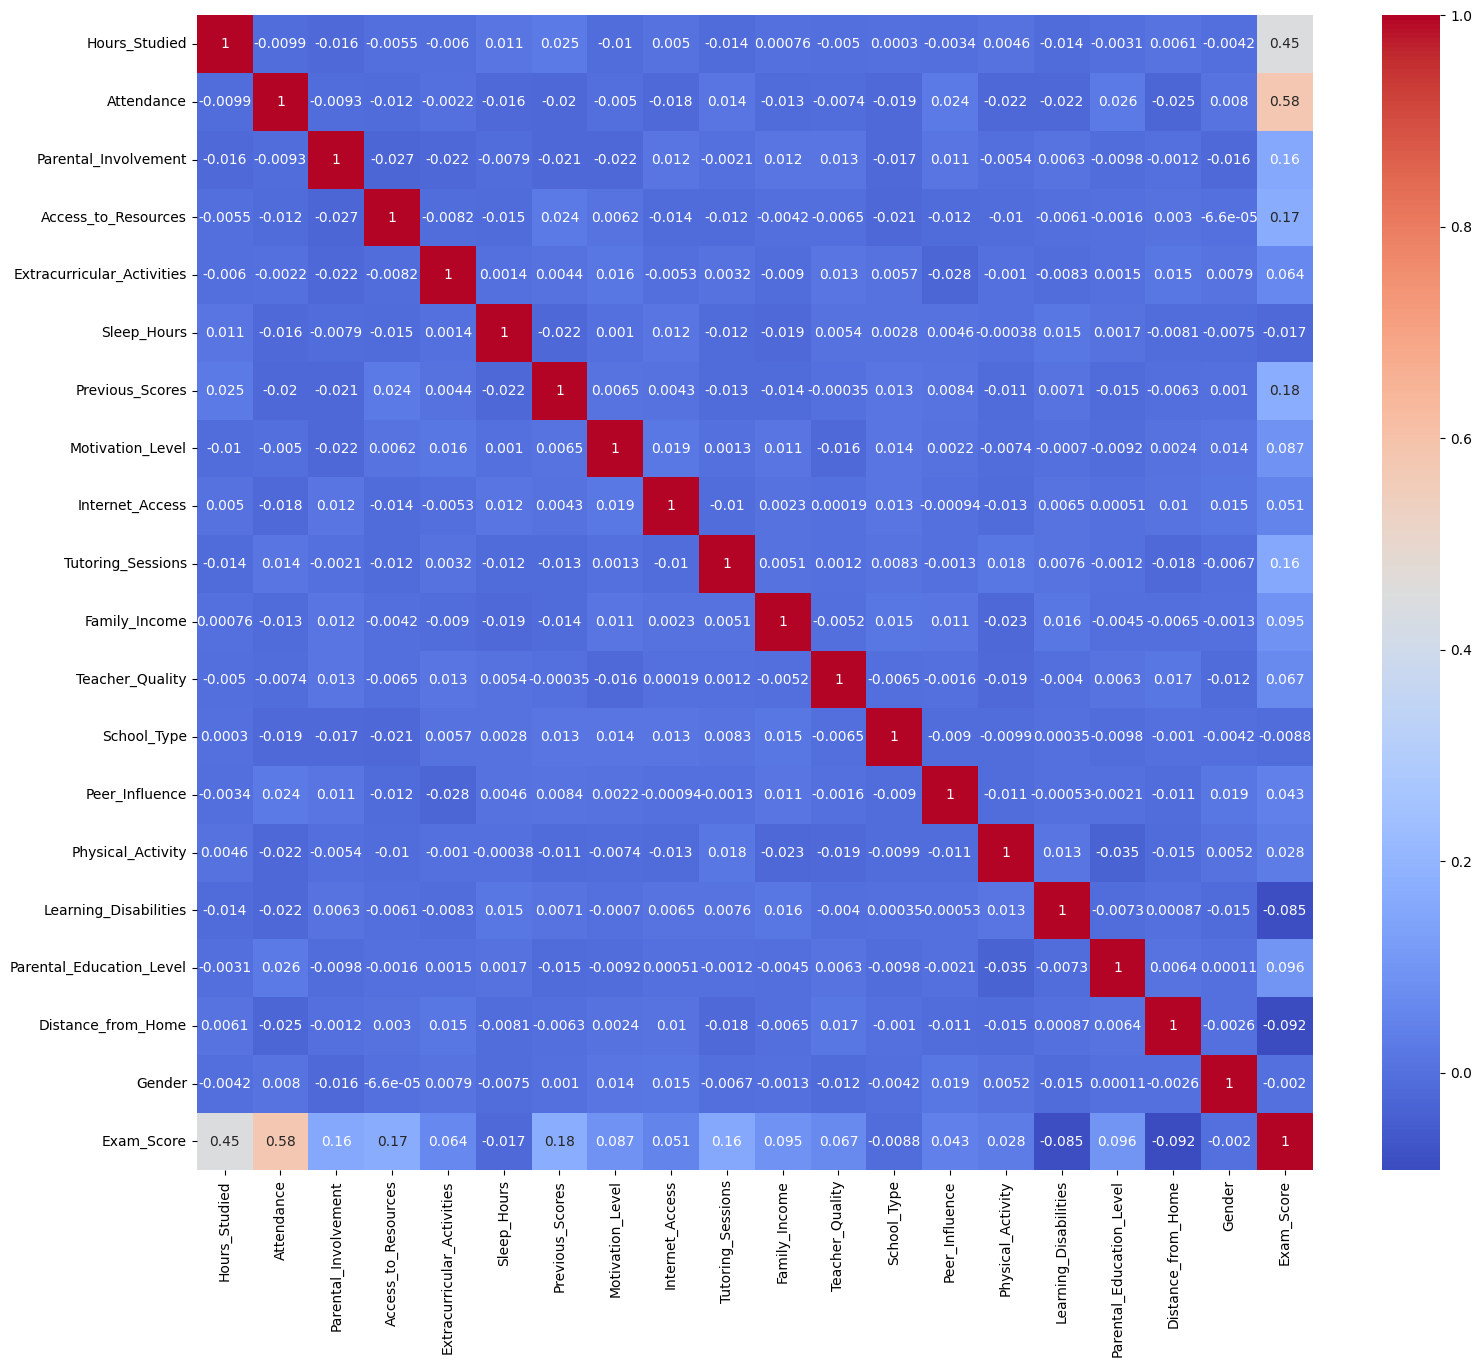

In [ ]:
matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df1=df.corr()['Exam_Score']
df1.sort_values(ascending=False)

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Access_to_Resources,0.169770
Parental_Involvement,0.157114
Tutoring_Sessions,0.156525
Parental_Education_Level,0.096426
Family_Income,0.094555
Motivation_Level,0.086937


In [ ]:
df.drop(columns=['Distance_from_Home'],inplace=True)
df.drop(columns=['Extracurricular_Activities'],inplace=True)
df.drop(columns=['Internet_Access'],inplace=True)
df.drop(columns=['Parental_Education_Level'],inplace=True)
df.drop(columns=['Physical_Activity'],inplace=True)
df.drop(columns=['Peer_Influence'],inplace=True)
df.drop(columns=['Gender'],inplace=True)
df.drop(columns=['School_Type'],inplace=True)
df.drop(columns=['Motivation_Level'],inplace=True)
df.drop(columns=['Sleep_Hours'],inplace=True)
df.drop(columns=['Family_Income'],inplace=True)
df.drop(columns=['Teacher_Quality'],inplace=True)
df.drop(columns=['Learning_Disabilities'],inplace=True)
df.drop(columns=['Access_to_Resources'],inplace=True)
df.drop(columns=['Parental_Involvement'],inplace=True)
df.drop(columns=[])

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


In [ ]:
df

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


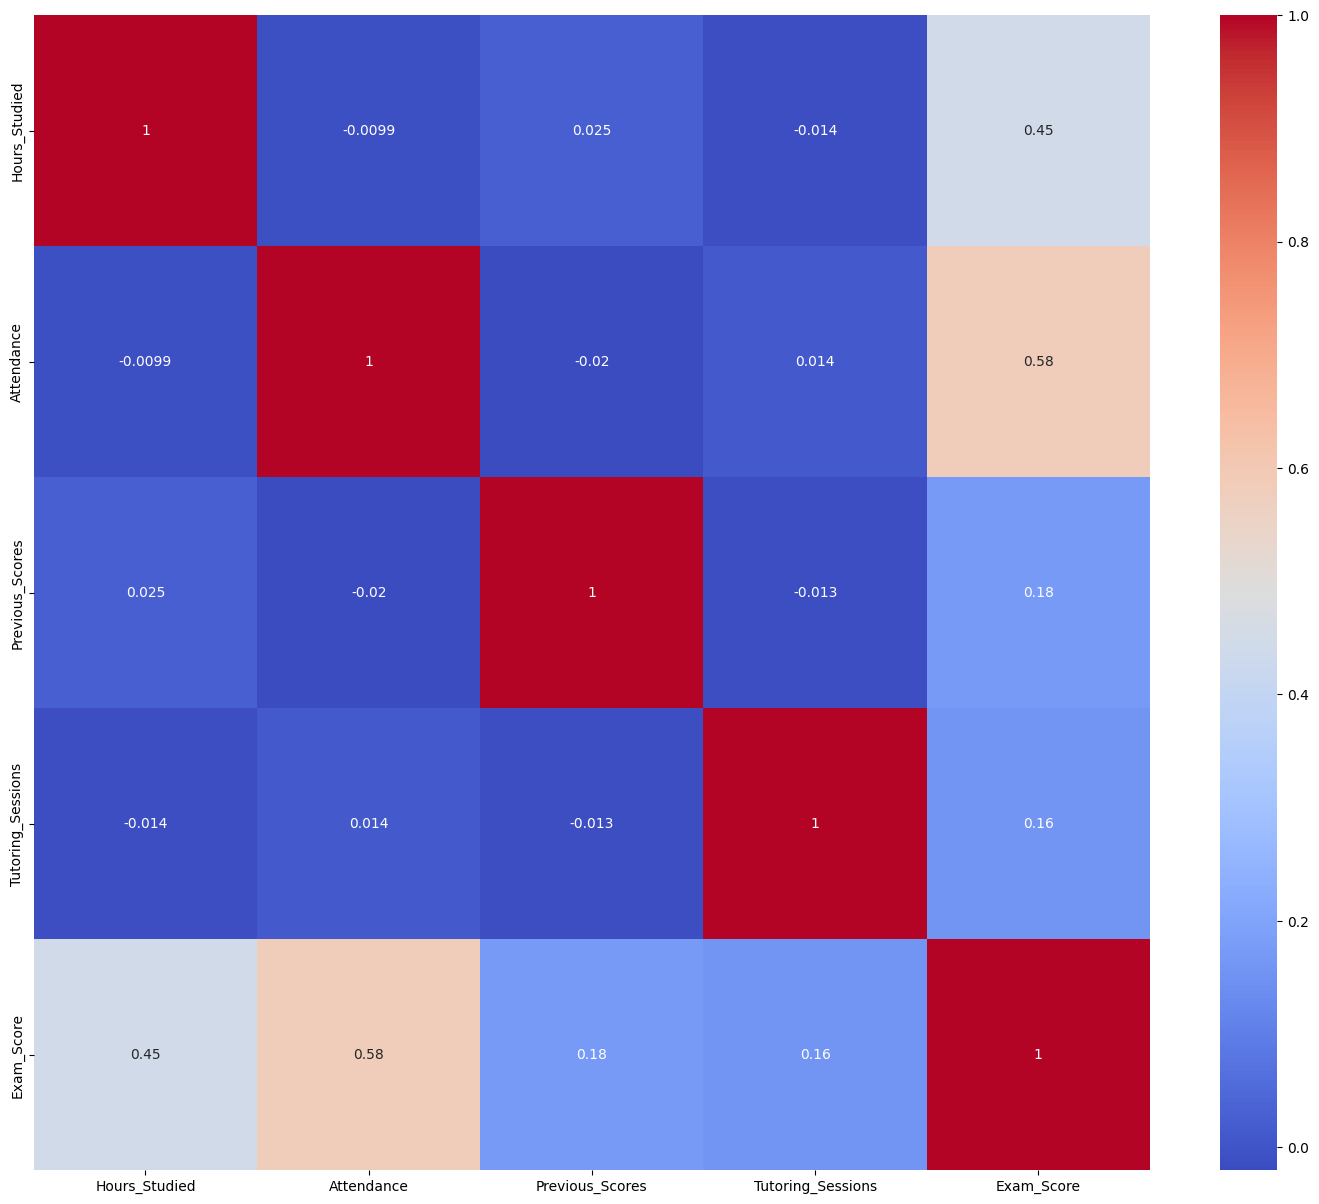

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df1=df.corr()['Exam_Score']
df1.sort_values(ascending=False)

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525


In [ ]:
df

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


# **SKEWNESS HANDLING**

*   List item
*   List item



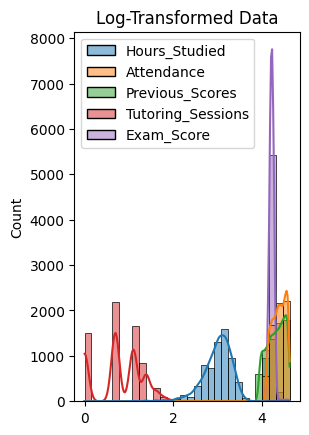

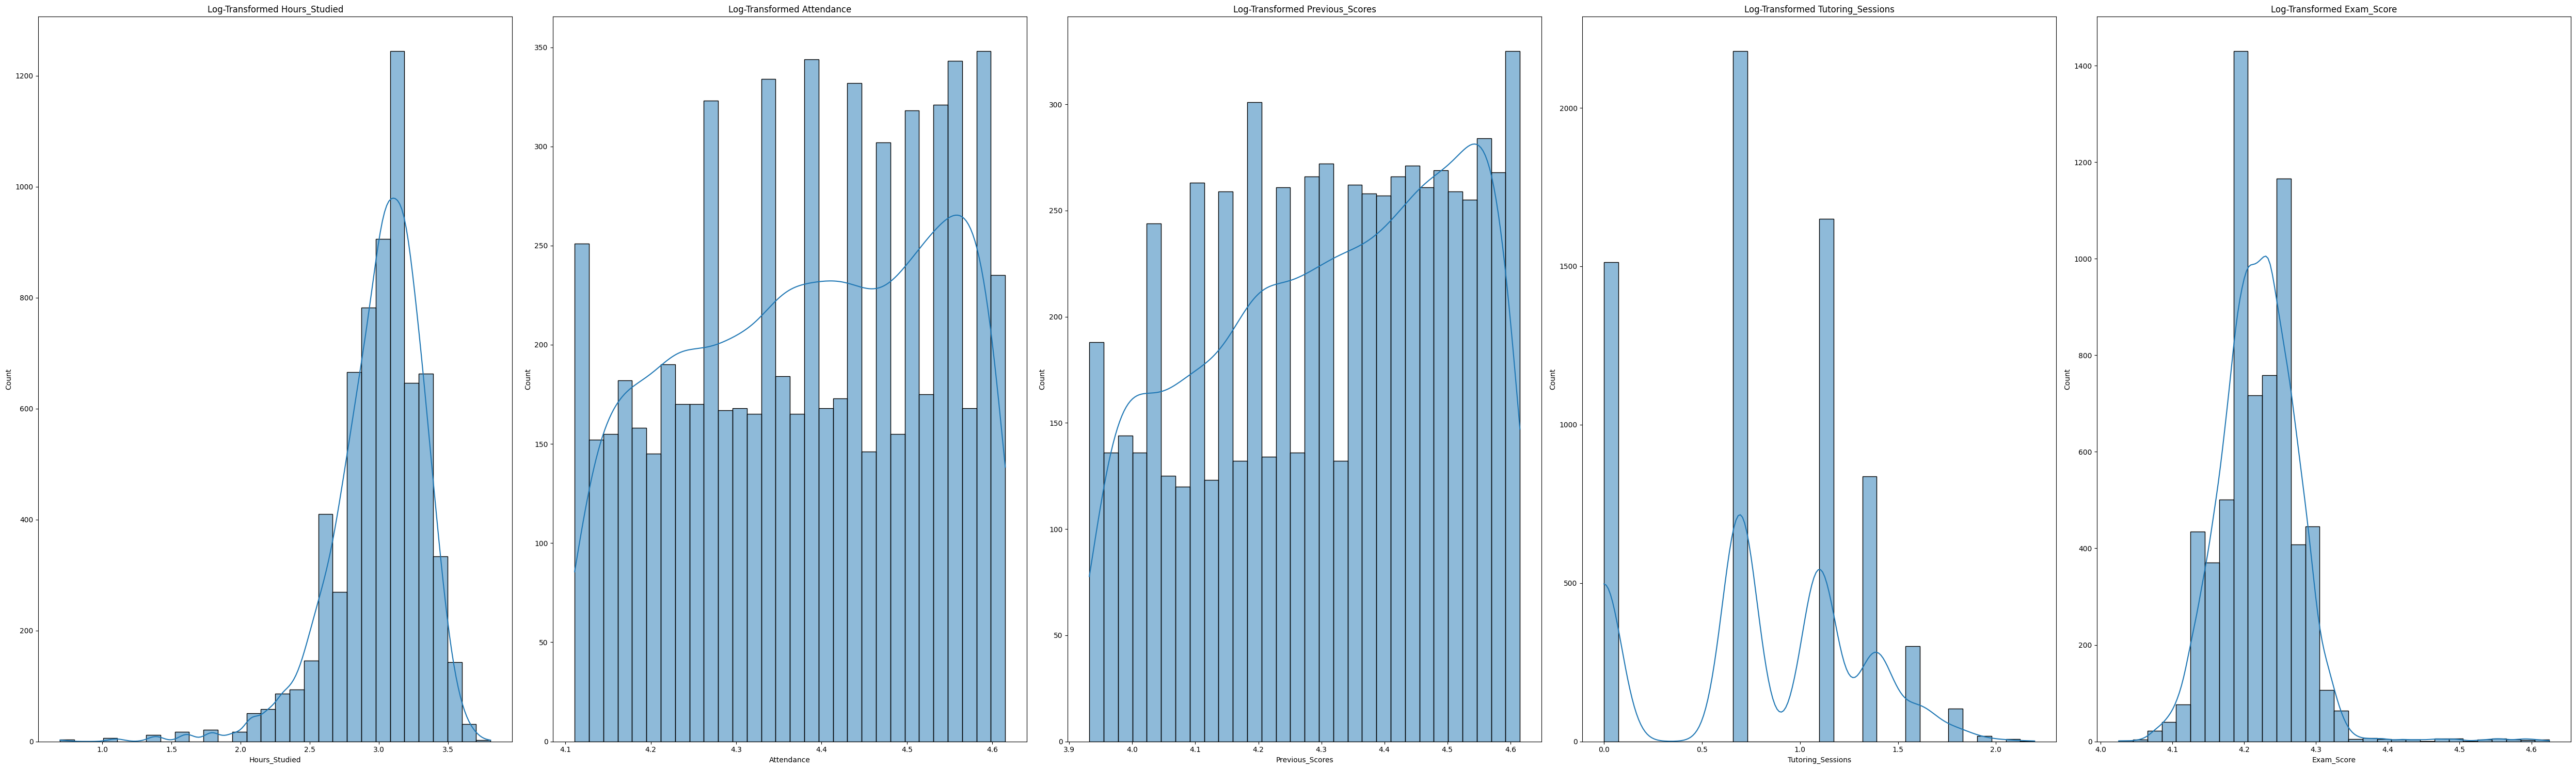

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **OUTLIER HANDLING**

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the dfFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)

In [ ]:
df.shape

(6054, 5)

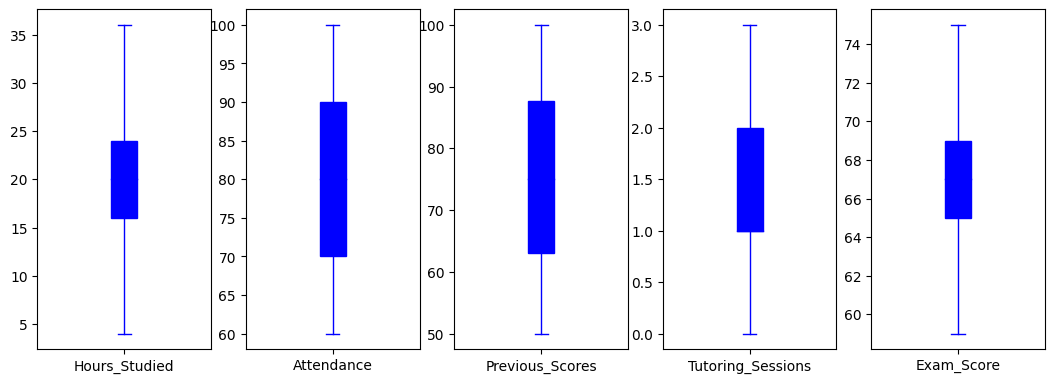

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# **MODEL TRAINING and EVALUATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x=df[["Hours_Studied","Attendance","Previous_Scores","Tutoring_Sessions"]]#features
y=df["Exam_Score"]#target value

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4843, 4), (1211, 4), (4843,), (1211,))

In [ ]:
#creating the linear regression model
model=LinearRegression()

In [ ]:
#traning the model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#making predictions on the test
y_pred=model.predict(x_test)
y_pred

array([66.04002778, 68.53355002, 66.77013509, ..., 64.93273376,
       72.31565421, 68.2763703 ])

In [ ]:
#model evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 2.1309390706872273
R-squared: 0.7875374879947107


In [ ]:
df

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


# **PRICE PREDICTION INTERFACE**

In [ ]:
#take user input for new data "TV","radio","new pepper"

Hours_Studied=  int(input("Enter the number of hours studied:"))
Attendance=int(input("Enter the number of attendance:"))
Previous_Scores=int(input("Enter the number of previous scores:"))
Tutoring_Session=int(input("Enter the number of tutoring sessions:"))
#creat a Nympy array with the user input 230.1.37.8.69.2.22.1
user_input=[[Hours_Studied,Attendance,Previous_Scores,Tutoring_Session]]
#make a prediction using thge traned model
score=model.predict(user_input)
print("predicted sore for new data:",score)

Enter the number of hours studied:23
Enter the number of attendance:84
Enter the number of previous scores:73
Enter the number of tutoring sessions:0
predicted sore for new data: [67.91778001]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **RESULTS and ANALYSIS**

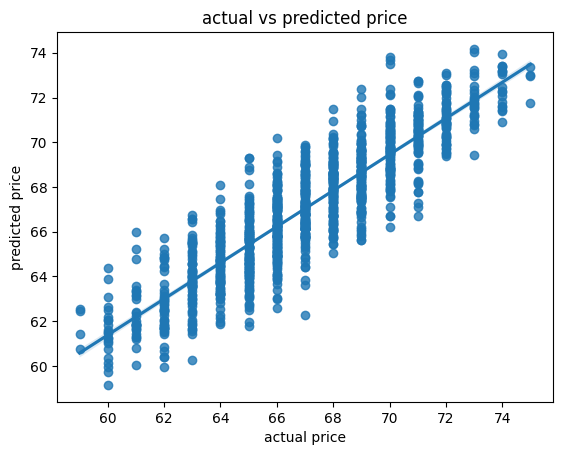

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()